# Spotify 1 Million Tracks - Tratamento e Modelação

### Importe das Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, r2_score, confusion_matrix,f1_score, classification_report
from sklearn.linear_model import LinearRegression, TweedieRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
%matplotlib inline


# Para visualizar os valores com cinco casas decimais
# pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Tratamento dos Dados

Carregar o dataset, previamente analisado

In [3]:
data = pd.read_csv('data.csv')

Eliminar coluns irrelevantes:
id e name

In [4]:
# Drop Id and Track Id columns
data.drop(['id', 'release_date'], axis=1, inplace=True, errors='ignore')
data

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,I Found You,70,0.0385,129.916,0.4720,2020


Remover duplicados

In [5]:
data.drop_duplicates(inplace=True)
data

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,I Found You,70,0.0385,129.916,0.4720,2020


Tratamento dos artistas

In [6]:
data["artists"] = data["artists"].str.replace("[\[\]']", "", regex=True)
data['artists'] = data['artists'].str.split(', ')
data = data.explode('artists')
data

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.9950,Carl Woitschach,0.708,158648,0.1950,0,0.56300,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,0.9940,Robert Schumann,0.379,282133,0.0135,0,0.90100,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
1,0.9940,Vladimir Horowitz,0.379,282133,0.0135,0,0.90100,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,0.6040,Seweryn Goszczyński,0.749,104300,0.2200,0,0.00000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,0.9950,Francisco Canaro,0.781,180760,0.1300,0,0.88700,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169906,0.5380,Kygo,0.514,180700,0.5390,0,0.00233,7,0.1080,-9.332,1,How Would I Know,70,0.1050,123.700,0.1530,2020
169906,0.5380,Oh Wonder,0.514,180700,0.5390,0,0.00233,7,0.1080,-9.332,1,How Would I Know,70,0.1050,123.700,0.1530,2020
169907,0.0714,Cash Cash,0.646,167308,0.7610,0,0.00000,1,0.2220,-2.557,1,I Found You,70,0.0385,129.916,0.4720,2020
169907,0.0714,Andy Grammer,0.646,167308,0.7610,0,0.00000,1,0.2220,-2.557,1,I Found You,70,0.0385,129.916,0.4720,2020


Encoding dos artistas

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['artists'] = label_encoder.fit_transform(data['artists'])

Encoding do nome da música

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['name'] = label_encoder.fit_transform(data['name'])

<Axes: >

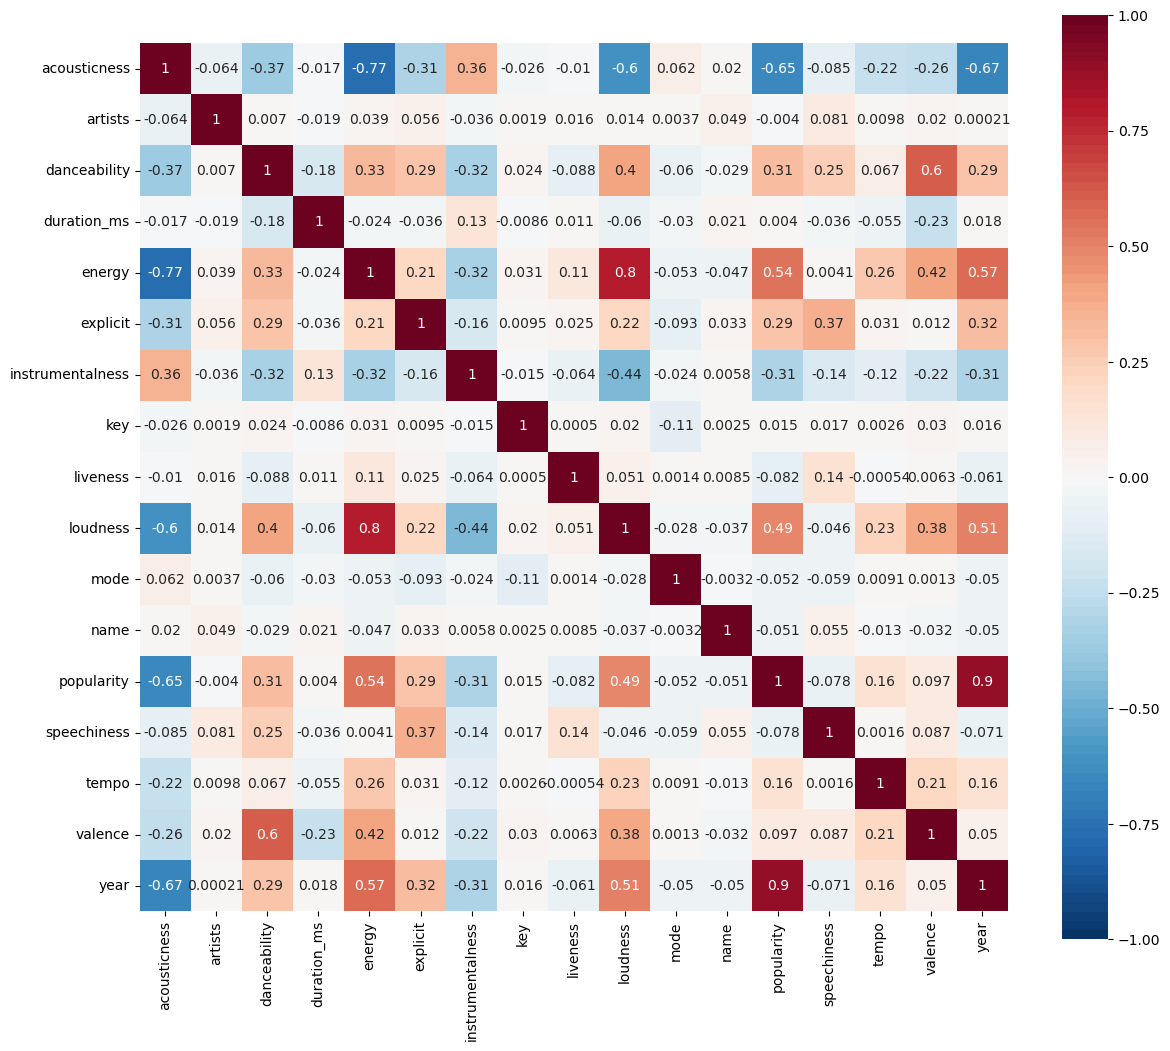

In [9]:
corr_matrix = data.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, cmap=sns.color_palette("RdBu_r", 100))

## Modelação 

Partição dos Dados entre dados de treino e teste

In [10]:
X = data.drop(['popularity'], axis=1)
y = data['popularity']
X


,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,speechiness,tempo,valence,year
0,0.9950,4166,0.708,158648,0.1950,0,0.56300,10,0.1510,-12.428,1,96100,0.0506,118.469,0.7790,1928
1,0.9940,20519,0.379,282133,0.0135,0,0.90100,8,0.0763,-28.454,1,34247,0.0462,83.972,0.0767,1928
1,0.9940,26210,0.379,282133,0.0135,0,0.90100,8,0.0763,-28.454,1,34247,0.0462,83.972,0.0767,1928
2,0.6040,21595,0.749,104300,0.2200,0,0.00000,5,0.1190,-19.924,0,18622,0.9290,107.177,0.8800,1928
3,0.9950,8356,0.781,180760,0.1300,0,0.88700,1,0.1110,-14.734,0,11093,0.0926,108.003,0.7200,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169906,0.5380,13656,0.514,180700,0.5390,0,0.00233,7,0.1080,-9.332,1,45940,0.1050,123.700,0.1530,2020
169906,0.5380,18049,0.514,180700,0.5390,0,0.00233,7,0.1080,-9.332,1,45940,0.1050,123.700,0.1530,2020
169907,0.0714,4302,0.646,167308,0.7610,0,0.00000,1,0.2220,-2.557,1,47513,0.0385,129.916,0.4720,2020
169907,0.0714,1534,0.646,167308,0.7610,0,0.00000,1,0.2220,-2.557,1,47513,0.0385,129.916,0.4720,2020


In [11]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Problema de regressão

Validação de modelos 
- sklearn.model_selection.train_test_split
- sklearn.model_selection.Kfold
- sklearn.model_selection.LeaveOneOut
- sklearn.model_selection.StratifiedKFold
- sklearn.model_selection.GridSearchCV
- sklearn.model_selection.RandomizedSearchCV

#### Modelo de Regressão Linear

Criação do modelo

In [12]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Previsões do modelo

In [13]:
predictions = lm.predict(X_test)
predictions

array([36.82483542,  4.74614658, 35.78690499, ..., 16.70157031,
       16.7448844 , 51.43691486])

Gráfico de previsão vs valor real
- X: valor real
- Y: previsão

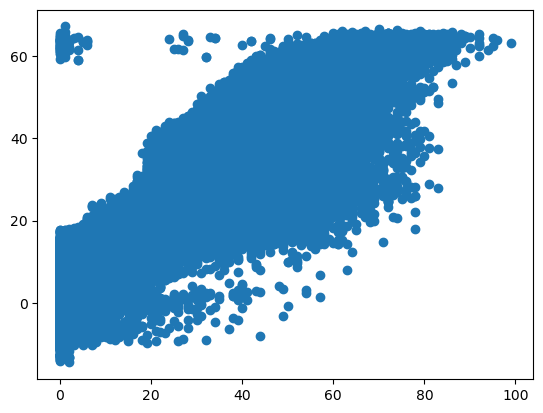

In [14]:
plt.scatter(y_test, predictions)

<Axes: xlabel='popularity', ylabel='Count'>

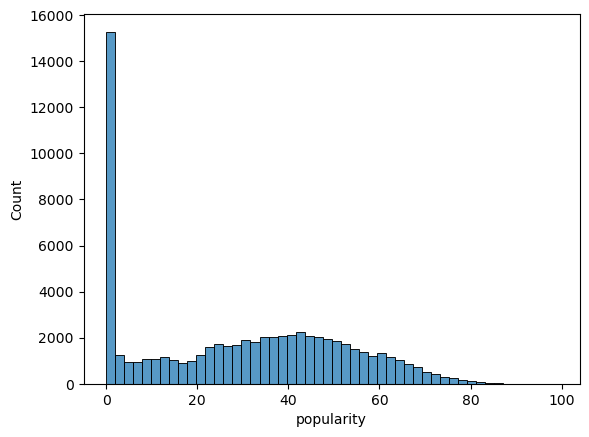

In [15]:
sns.histplot(y_test, bins=50)

<Axes: ylabel='Count'>

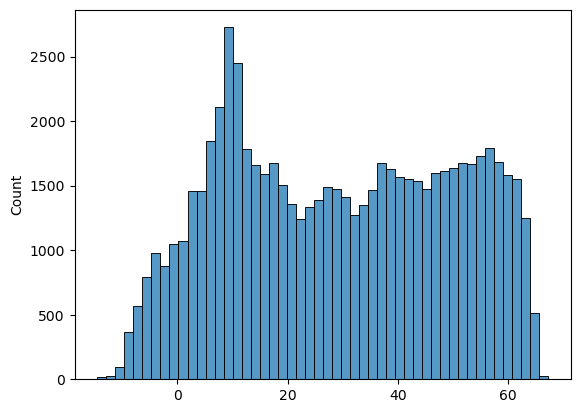

In [16]:
sns.histplot(predictions, bins=50)

Valor máximo da previsão

In [17]:
predictions.max()

67.27429814749166

Comparar os valores previstos com os reais

In [18]:
pd.merge(pd.DataFrame(y_test), pd.DataFrame(predictions), left_index=True, right_index=True)    

,popularity,0
4,1,8.128190
6,0,25.923633
8,0,19.527664
11,1,50.309679
12,0,29.309060
...,...,...
67612,45,50.260079
67614,29,39.332047
67616,27,9.114920
67618,32,50.999481


Avaliação do Modelo

In [19]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.54470774783417
MSE: 96.91566635278467
RMSE: 9.844575478545769


#### Árvores de Decisão

Criação do modelo

In [20]:
dtree=DecisionTreeRegressor(random_state=2023)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=2023)

Previsões do modelo

In [21]:
pred = dtree.predict(X_test)

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R²:', np.sqrt(metrics.r2_score(y_test, pred)))

MAE: 6.516646456281487
MSE: 119.40465956181258
RMSE: 10.927243914263677
R²: 0.8760825125706447


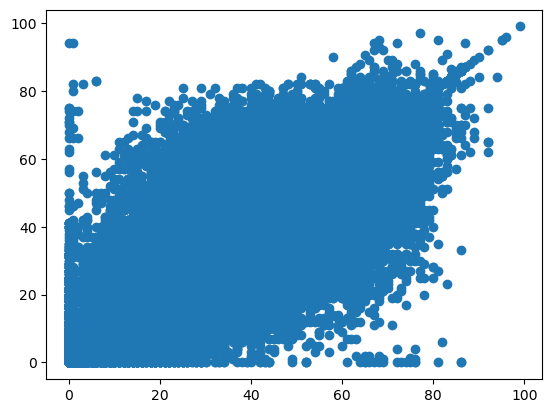

In [23]:
plt.scatter(y_test, pred)

Grid Search

In [24]:
# 'absolute_error', 'poisson', 'squared_error', 'friedman_mse'
param_grid = {'criterion':['absolute_error'],'max_depth':[4]}

grid_reg_bt = GridSearchCV(dtree, param_grid, refit=True, verbose=3, n_jobs=-1)

In [25]:
grid_reg_bt.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[CV 4/5] END criterion=absolute_error, max_depth=4;, score=0.837 total time=11.7min
[CV 1/5] END criterion=absolute_error, max_depth=4;, score=0.840 total time=12.0min
[CV 5/5] END criterion=absolute_error, max_depth=4;, score=0.839 total time=12.2min
[CV 2/5] END criterion=absolute_error, max_depth=4;, score=0.836 total time=12.5min
[CV 3/5] END criterion=absolute_error, max_depth=4;, score=0.836 total time=12.5min


GridSearchCV(estimator=DecisionTreeRegressor(random_state=2023), n_jobs=-1,
             param_grid={'criterion': ['absolute_error'], 'max_depth': [4]},
             verbose=3)

In [26]:
grid_reg_bt_predictions = grid_reg_bt.predict(X_test)

In [27]:
grid_reg_bt.best_params_

{'criterion': 'absolute_error', 'max_depth': 4}

In [28]:
grid_reg_bt.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      random_state=2023)

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, grid_reg_bt_predictions))
print('MSE:', metrics.mean_squared_error(y_test, grid_reg_bt_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_reg_bt_predictions)))
print('R²:', np.sqrt(metrics.r2_score(y_test, grid_reg_bt_predictions)))

MAE: 5.959598947088225
MSE: 84.34808198515276
RMSE: 9.184121187416505
R²: 0.914207472242581


#### Gradient Boosted Trees

In [30]:
xgbreg=XGBRegressor()
xgbreg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [31]:
pred = xgbreg.predict(X_test)

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 5.808668123344993
MSE: 68.62230935131085
RMSE: 8.283858361374296


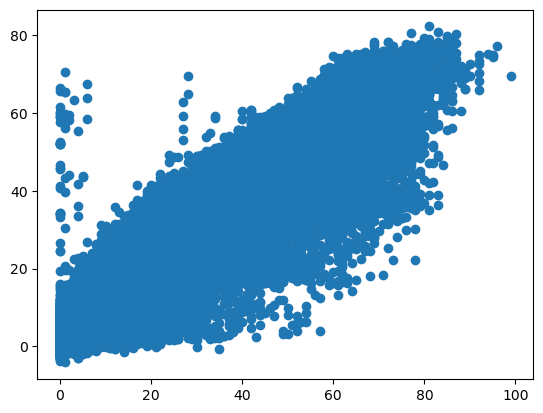

In [33]:
plt.scatter(y_test, pred)

#### Random Forest

In [34]:
rf = RandomForestRegressor(n_estimators=200, random_state=2023)

In [35]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=2023)

In [36]:
pred = rf.predict(X_test)
pred

array([36.04 ,  0.18 , 38.29 , ..., 15.74 , 12.825, 46.69 ])

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R²:', np.sqrt(metrics.r2_score(y_test, pred)))

MAE: 5.118457939816584
MSE: 59.69538993029306
RMSE: 7.72627917760503
R²: 0.9400924402533186


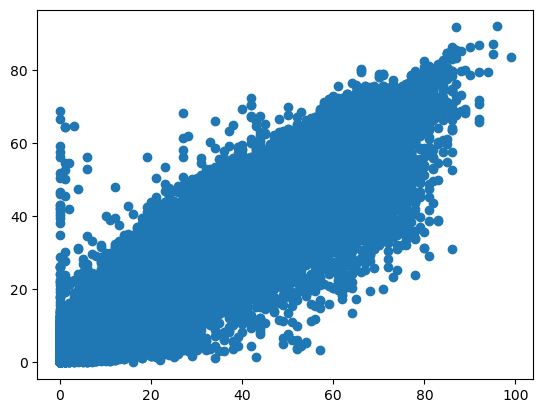

In [38]:
plt.scatter(y_test, pred)

Redes Neuronais

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor#, KerasClassifier

2023-11-23 14:37:41.443785: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-23 14:37:41.698699: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-23 14:37:41.698777: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-23 14:37:41.747761: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-23 14:37:41.851458: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-23 14:37:41.852916: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [40]:
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.15.0


Data scalling

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(X)
scaler_Y = MinMaxScaler(feature_range=(0, 1)).fit(np.array(y).reshape(-1, 1))
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)
y_scaled = pd.DataFrame(scaler_Y.transform(np.array(y).reshape(-1, 1)))


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=2021)

In [48]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation=activation)) # output

    # Compile the model
    model.compile(
        loss = 'mae',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['mae', 'mse']
    )
    return model

Construção do modelo

In [49]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1905 (7.44 KB)
Trainable params: 1905 (7.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-11-23 14:40:16.888474: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: ROG-Zephyrus-G14
2023-11-23 14:40:16.888516: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: ROG-Zephyrus-G14
2023-11-23 14:40:16.888708: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2023-11-23 14:40:16.888779: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 535.129.3


GridSearch

In [50]:
#optimizer = ['SGD', 'RMSprop', 'Adagrad']
optimizer = ['RMSprop'] # foi o que apresentou melhores resultados
param_grid = dict(optimizer = optimizer)

In [51]:
kf = KFold(n_splits=5, shuffle=True, random_state=2021)

Keras Regressor

In [52]:
model = KerasRegressor(model = build_model, batch_size = 32, validation_split=0.2, epochs=20)

Criar um modelo Grid Search

In [53]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring='neg_mean_absolute_error', refit='True', verbose=1)

In [54]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Epoch 1/20
3607/3607 [==============================] - 6s 2ms/step - loss: 0.0669 - mae: 0.0669 - mse: 0.0099 - val_loss: 0.0624 - val_mae: 0.0624 - val_mse: 0.0089
Epoch 2/20
3607/3607 [==============================] - 5s 1ms/step - loss: 0.0638 - mae: 0.0638 - mse: 0.0092 - val_loss: 0.0676 - val_mae: 0.0676 - val_mse: 0.0090
Epoch 3/20
3607/3607 [==============================] - 5s 1ms/step - loss: 0.0629 - mae: 0.0629 - mse: 0.0090 - val_loss: 0.0645 - val_mae: 0.0645 - val_mse: 0.0095
Epoch 4/20
3607/3607 [==============================] - 5s 1ms/step - loss: 0.0627 - mae: 0.0627 - mse: 0.0089 - val_loss: 0.0640 - val_mae: 0.0640 - val_mse: 0.0101
Epoch 5/20
3607/3607 [==============================] - 5s 1ms/step - loss: 0.0623 - mae: 0.0623 - mse: 0.0089 - val_loss: 0.0601 - val_mae: 0.0601 - val_mse: 0.0083
Epoch 6/20
3607/3607 [==============================] - 5s 2ms/step - loss: 0.0619 - mae: 0.0619 - mse: 0.0088 

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=KerasRegressor(batch_size=32, epochs=20, model=<function build_model at 0x7f036baa4dc0>, validation_split=0.2),
             param_grid={'optimizer': ['RMSprop']}, refit='True',
             scoring='neg_mean_absolute_error', verbose=1)

Verificar qual é o valor e os parâmetros do melhor resultado

In [55]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: -0.107831 using {'optimizer': 'RMSprop'}


In [56]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

In [57]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-0.107831 (0.093851) with: {'optimizer': 'RMSprop'}


Encontrar o melhor modelo

In [58]:
best_mlp_model = grid_search.best_estimator_ 
print(best_mlp_model)

KerasRegressor(
	model=<function build_model at 0x7f036baa4dc0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=RMSprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
)


Usar o melhor modelo

In [59]:
best_mlp_model.fit(X_train, y_train, epochs = 40, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/40


5636/5636 [==============================] - 10s 2ms/step - loss: 0.0667 - mae: 0.0667 - mse: 0.0099 - val_loss: 0.0608 - val_mae: 0.0608 - val_mse: 0.0084
Epoch 2/40
5636/5636 [==============================] - 9s 2ms/step - loss: 0.0627 - mae: 0.0627 - mse: 0.0089 - val_loss: 0.0610 - val_mae: 0.0610 - val_mse: 0.0083
Epoch 3/40
5636/5636 [==============================] - 9s 2ms/step - loss: 0.0616 - mae: 0.0616 - mse: 0.0087 - val_loss: 0.0593 - val_mae: 0.0593 - val_mse: 0.0080
Epoch 4/40
5636/5636 [==============================] - 8s 2ms/step - loss: 0.0612 - mae: 0.0612 - mse: 0.0087 - val_loss: 0.0655 - val_mae: 0.0655 - val_mse: 0.0086
Epoch 5/40
5636/5636 [==============================] - 9s 2ms/step - loss: 0.0610 - mae: 0.0610 - mse: 0.0087 - val_loss: 0.0659 - val_mae: 0.0659 - val_mse: 0.0101
Epoch 6/40
5636/5636 [==============================] - 9s 2ms/step - loss: 0.0609 - mae: 0.0609 - mse: 0.0086 - val_loss: 0.0616 - val_mae: 0.0616 - val_mse: 0.0089
Epoch 7/40
563

KerasRegressor(
	model=<function build_model at 0x7f036baa4dc0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=RMSprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
)

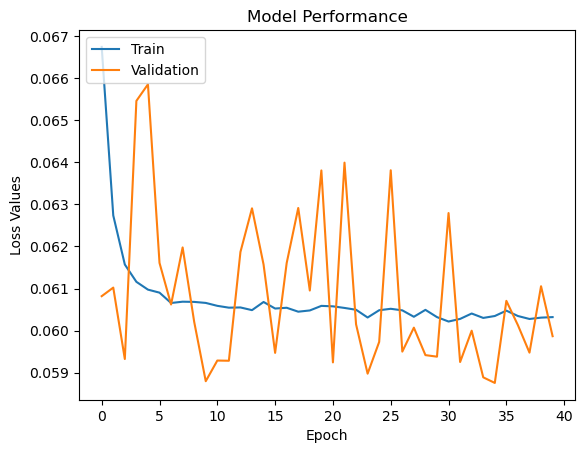

In [60]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('Model Performance')
plt.ylabel('Loss Values')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

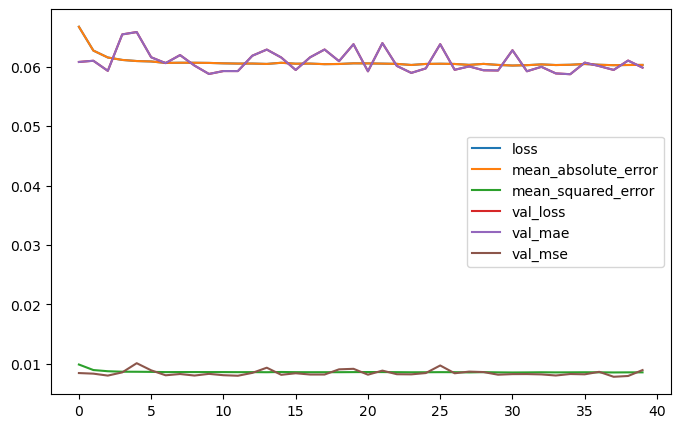

In [61]:
pd.DataFrame(best_mlp_model.history_).plot(figsize=(8, 5))
plt.show()

Previsões

In [62]:
predictions = best_mlp_model.predict(X_test)
predictions

1409/1409 [==============================] - 1s 944us/step


array([[0.51751846],
       [0.5055151 ],
       [0.3262772 ],
       ...,
       [0.2390776 ],
       [0.        ],
       [0.3585212 ]], dtype=float32)

Observar os valores obtidos vs os valores reais

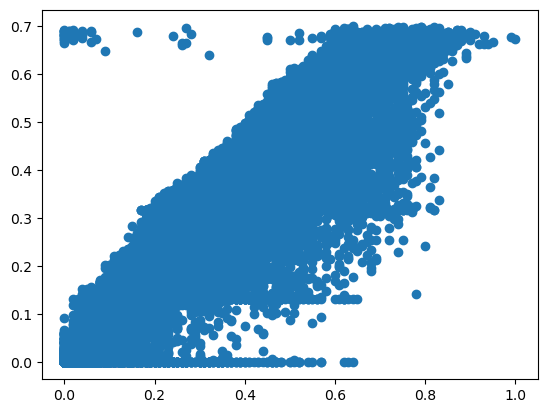

In [63]:
plt.scatter(y_test, predictions)

In [64]:
predictions = predictions.reshape(predictions.shape[0], 1)
predictions_unscaled = scaler_Y.inverse_transform(predictions)
y_test_unscaled = scaler_Y.inverse_transform(y_test)

Avaliar o modelo

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test_unscaled, predictions_unscaled))
print('MSE:', metrics.mean_squared_error(y_test_unscaled, predictions_unscaled))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test_unscaled, predictions_unscaled)))

MAE: 5.986789917684601
MSE: 89.41030940521222
RMSE 9.455702480789686


Criar uma forma de visualizar os resultados do modelo